In [1]:
#importing necessary libraries

In [2]:
import os
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#importing dataset
train= pd.read_csv('train.csv')

In [4]:
test=pd.read_csv('test.csv')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


## data fields
#### time series
#### datetime - hourly date + timestamp

### categorical
1. season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
2. holiday - whether the day is considered a holiday
3. workingday - whether the day is neither a weekend nor holiday
4. weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
  2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 

### numeric
1. temp - temperature in Celsius
2. atemp - "feels like" temperature in Celsius
3. humidity - relative humidity
4. windspeed - wind speed
5. casual - number of non-registered user rentals initiated
6. registered - number of registered user rentals initiated
7. count - number of total rentals

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [9]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [10]:
#visualize dataset

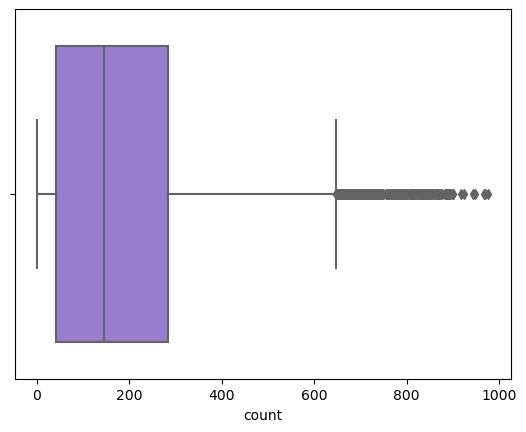

In [11]:
#boxplot the count
sns.boxplot(x='count', data=train, color='mediumpurple')
plt.show()

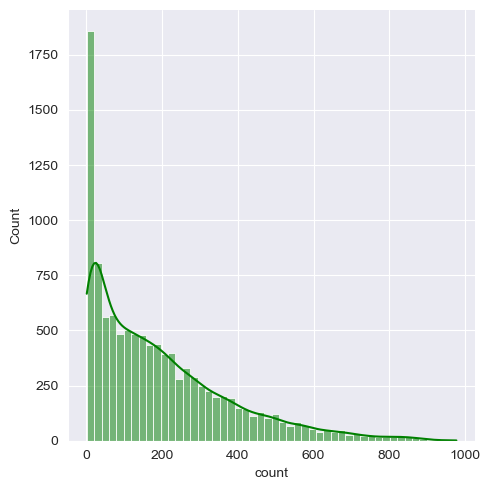

In [12]:
#histogram of count column
sns.set_style('darkgrid')
sns.displot(train['count'], bins=50, color='green', kde=True)
plt.show()

['temp', 'atemp', 'humidity', 'windspeed']


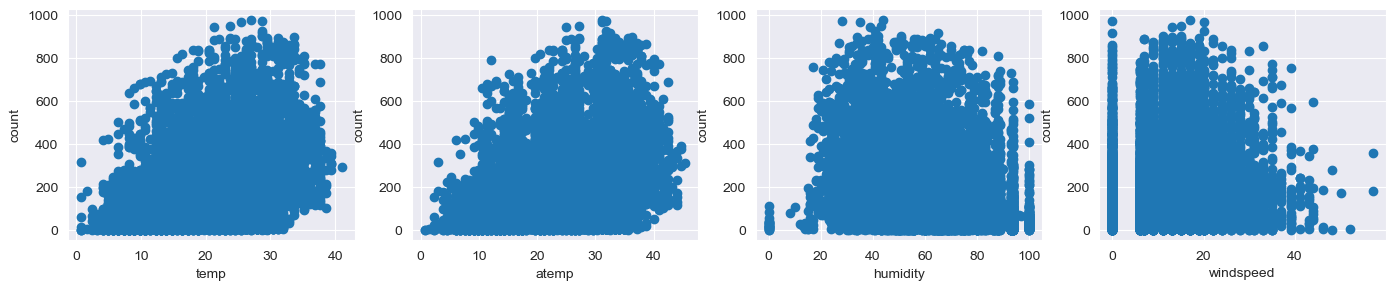

In [13]:
#scatter plot between count and each numeric features
fields=[f for f in train]
fields = fields[5:-3]
print(fields)

fig=plt.figure(figsize=(17,3))
for i,f in enumerate(fields):
    ax=fig.add_subplot(1, 4, i+1)
    ax.scatter(train[f], train['count'])
    ax.set_ylabel('count')
    ax.set_xlabel(f)
    
plt.show()

[Text(0.5, 0, 'weather'), Text(0, 0.5, 'count')]

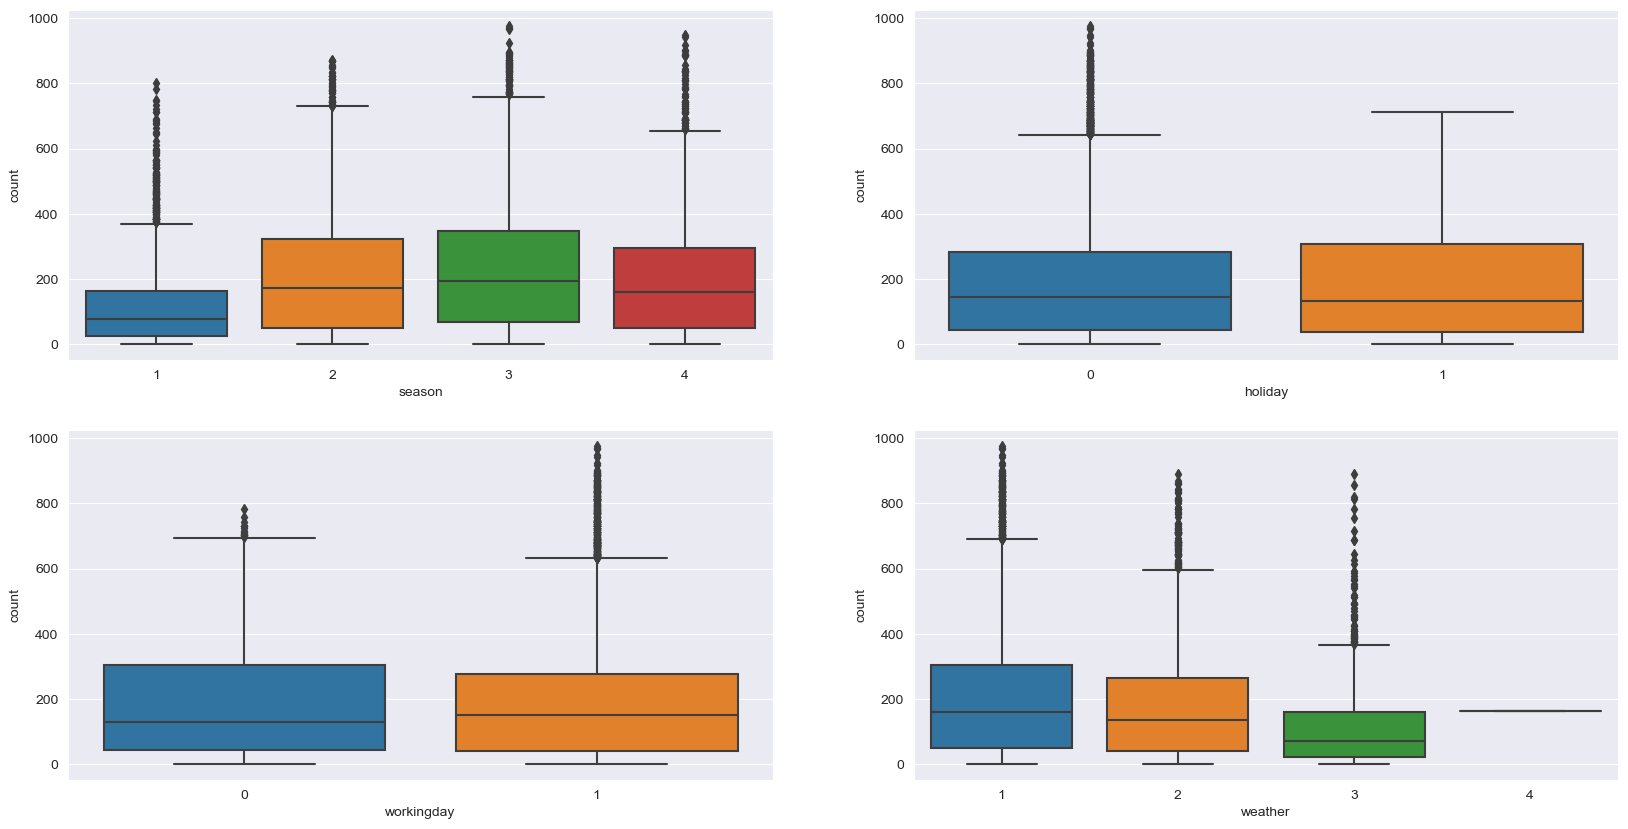

In [14]:
#boxplot between count and each categorical features
fig,axes=plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(20, 10)
sns.boxplot(data=train,y='count',x='season',ax=axes[0][0])
sns.boxplot(data=train,y='count',x='holiday',ax=axes[0][1])
sns.boxplot(data=train,y='count',x='workingday',ax=axes[1][0])
sns.boxplot(data=train,y='count',x='weather',ax=axes[1][1])

axes[0][0].set(xlabel='season', ylabel='count')
axes[0][1].set(xlabel='holiday', ylabel='count')
axes[1][0].set(xlabel='workingday', ylabel='count')
axes[1][1].set(xlabel='weather', ylabel='count')

<AxesSubplot:>

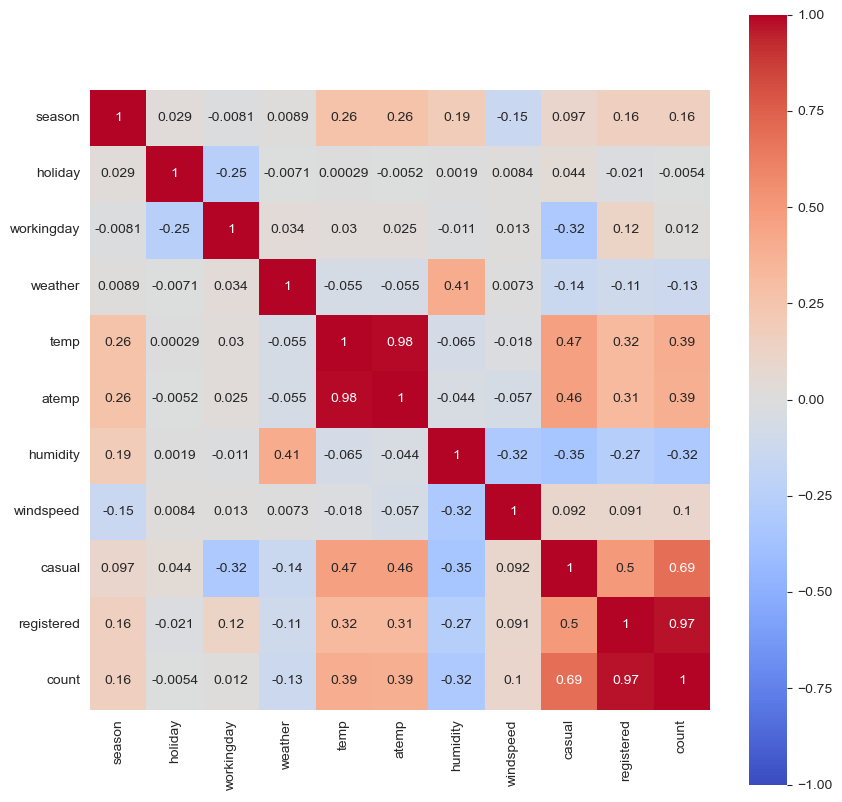

In [15]:
#correlation between each features
plt.figure(figsize=(10,10))
sns.heatmap(train.corr('pearson'), vmin=-1, vmax=1, cmap='coolwarm', annot=True, square=True)

In [16]:
#data preprocessing

In [17]:
train['datetime']=pd.to_datetime(train['datetime'])
test['datetime']=pd.to_datetime(test['datetime'])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [18]:
def split_datetime(df):
    df['year']=df['datetime'].apply(lambda t:t.year)
    df['month']=df['datetime'].apply(lambda t:t.month)
    df['day']=df['datetime'].apply(lambda t:t.day)
    df['dayofweek']=df['datetime'].apply(lambda t:t.dayofweek)
    df['hour']=df['datetime'].apply(lambda t:t.hour)
    df=df.drop(['datetime'],axis=1)
    return df

In [19]:
train=split_datetime(train)
test=split_datetime(test)
train=train.drop(['casual', 'registered'], axis=1)
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,dayofweek,hour
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,5,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,5,1
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,5,2
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,5,3
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,5,4


<AxesSubplot:xlabel='hour', ylabel='count'>

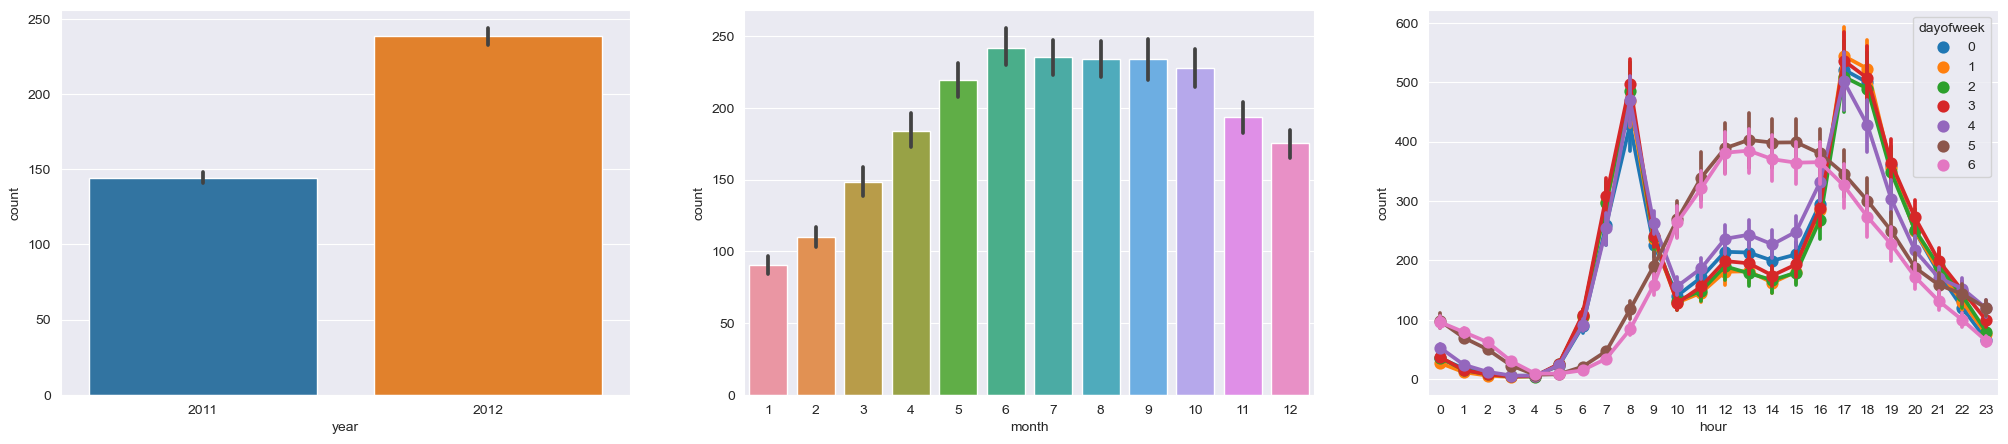

In [20]:
#plot between count and each categorical column
fig,axes=plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(25,5)
sns.barplot(data=train, x='year',y='count', ax=axes[0])
sns.barplot(data=train, x='month',y='count', ax=axes[1])
sns.pointplot(data=train, x='hour',y='count', ax=axes[2], hue='dayofweek')

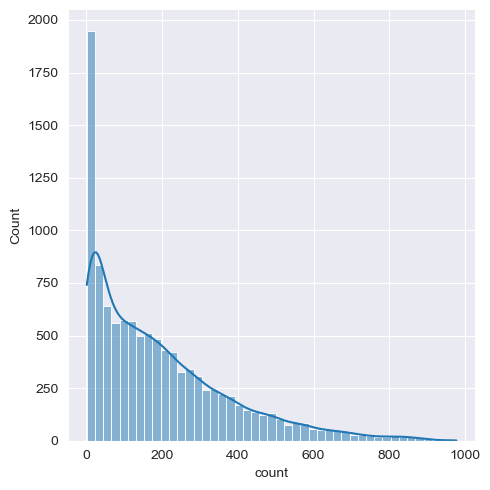

In [21]:
sns.displot(train['count'], kde=True)

In [22]:
train['count']=np.log1p(train['count'])

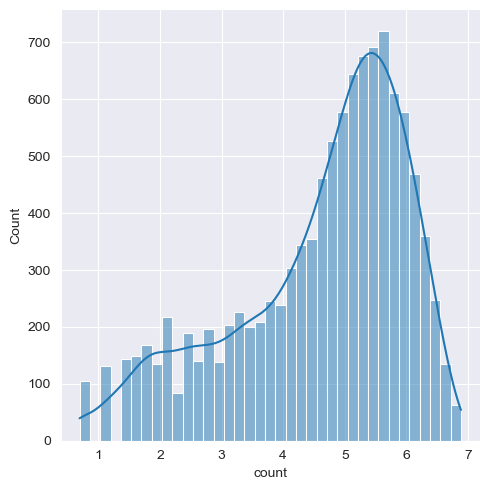

In [23]:
sns.displot(train['count'], kde=True)

In [24]:
train=train[np.abs(train['count'])-train['count'].mean()<=(3*train['count'].std())]

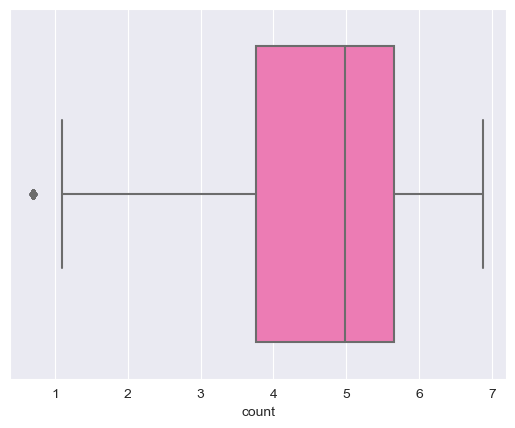

In [25]:
sns.boxplot(x='count', data=train, color='hotpink')
plt.show()

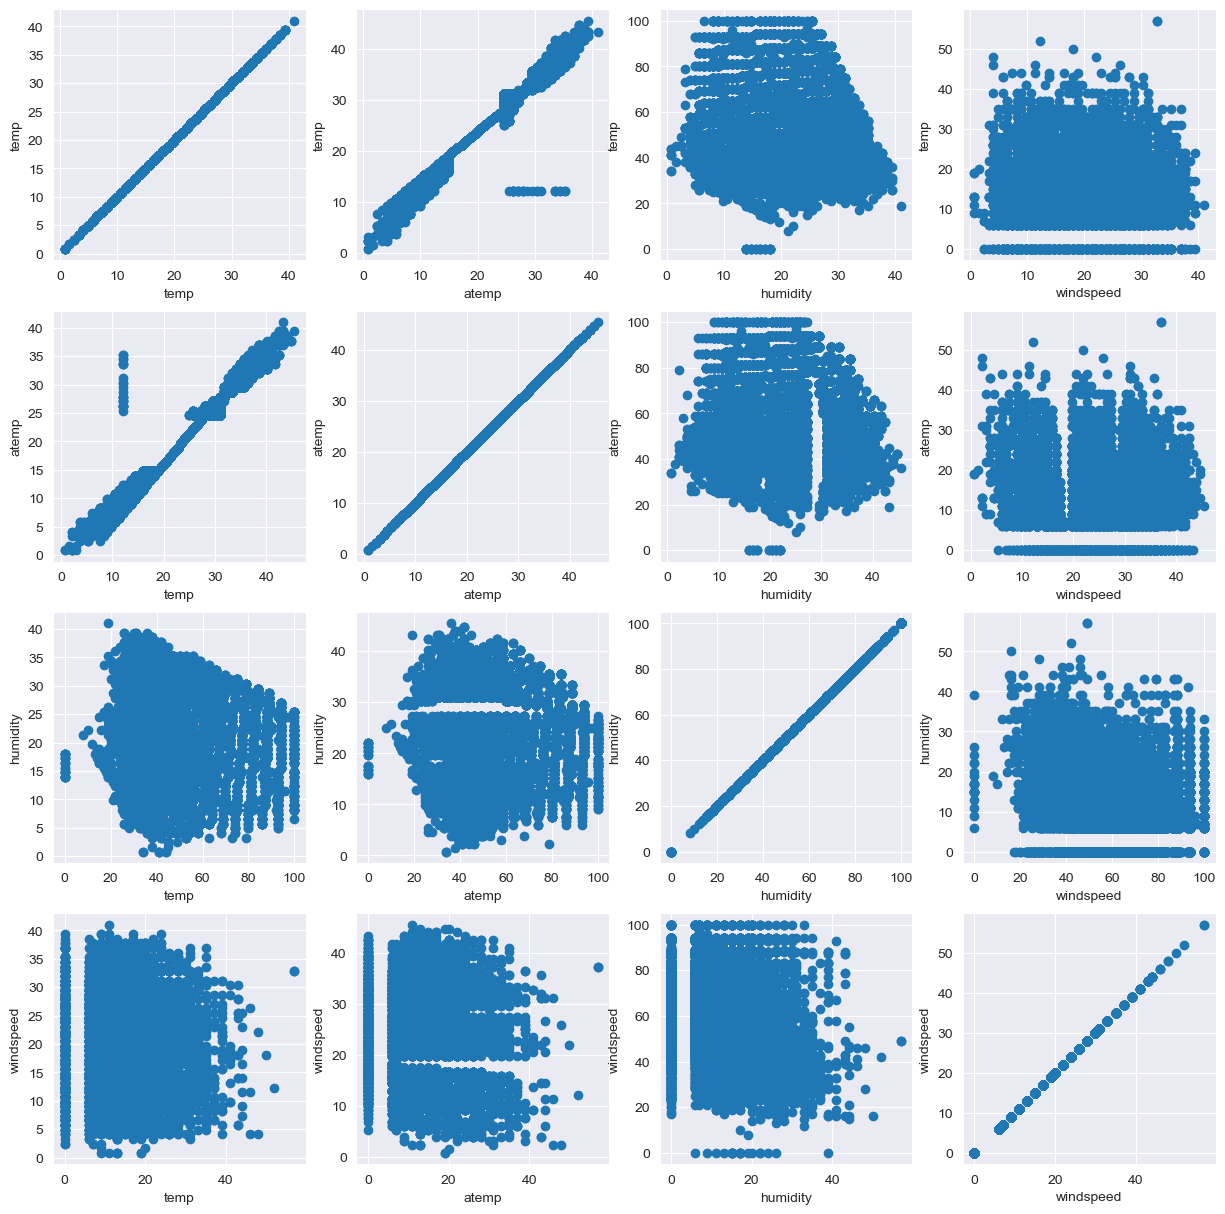

In [26]:
fig=plt.figure(figsize=(15,15))
for i,f1 in enumerate(fields):
    for j,f2 in enumerate(fields):
        idx=i*len(fields)+j+1
        ax=fig.add_subplot(len(fields),len(fields),idx)
        ax.scatter(train[f1], train[f2])
        ax.set_ylabel(f1)
        ax.set_xlabel(f2)

plt.show()

In [27]:
drop_idx=train[(train['atemp']>20) & (train['atemp']<40) &(train['temp']>10) & (train['temp']<20)].index
train=train.drop(drop_idx)

In [28]:
from sklearn.preprocessing import MinMaxScaler
def scaling(df):
    scaler=MinMaxScaler()
    num_cols=['atemp', 'temp', 'humidity', 'windspeed']
    df[num_cols]=scaler.fit_transform(df[num_cols])
    return df

In [29]:
train=scaling(train)
test=scaling(test)

In [30]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,dayofweek,hour
0,1,0,0,1,0.224490,0.305068,0.81,0.0,2.833213,2011,1,1,5,0
1,1,0,0,1,0.204082,0.288064,0.80,0.0,3.713572,2011,1,1,5,1
2,1,0,0,1,0.204082,0.288064,0.80,0.0,3.496508,2011,1,1,5,2
3,1,0,0,1,0.224490,0.305068,0.75,0.0,2.639057,2011,1,1,5,3
4,1,0,0,1,0.224490,0.305068,0.75,0.0,0.693147,2011,1,1,5,4


In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test=train_test_split(train.drop(['count'],axis=1), train['count'], test_size=0.3)

In [32]:
#define metric
def rmsle(y, pred):
    log_y=np.log1p(y)
    log_pred=np.log1p(pred)
    squared_error=(log_y-log_pred)**2
    rmsle=(np.sqrt(np.mean(squared_error)))
    return rmsle

## Model Selection

In [36]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.model_selection import GridSearchCV

In [42]:
def evaluate(reg_cls, params=None):
    reg=reg_cls()
    if params:
        reg=GridSearchCV(reg, param_grid=params, refit=True)
    reg.fit(x_train, y_train)
    pred=reg.predict(x_test)
    
    y_test_exp=np.expm1(y_test)
    pred_exp=np.expm1(pred)
    print('\n', reg_cls)
    if params:
        print(reg.best_params_)
        reg=reg.best_estimator_
    print(rmsle(y_test_exp,pred_exp))
    return reg, pred_exp
    

In [43]:
lr_reg, pred_lr=evaluate(LinearRegression)
rg_reg, pred_rg=evaluate(Ridge)
ls_reg, pred_ls=evaluate(Lasso)
rf_reg, pred_rf=evaluate(RandomForestRegressor)
gb_reg, pred_gb=evaluate(GradientBoostingRegressor)
xg_reg, pred_xg=evaluate(XGBRegressor)
lg_reg, pred_lg=evaluate(LGBMRegressor)

params={'n_estimators' :[100*i for i in range(1,6)]}
xg_reg, pred_xg=evaluate(XGBRegressor, params)
lg_reg, pred_lg=evaluate(LGBMRegressor, params)


 <class 'sklearn.linear_model._base.LinearRegression'>
1.0213328357090625

 <class 'sklearn.linear_model._ridge.Ridge'>
1.021236930862921

 <class 'sklearn.linear_model._coordinate_descent.Lasso'>
1.1965178243181813

 <class 'sklearn.ensemble._forest.RandomForestRegressor'>
0.30030234636833775

 <class 'sklearn.ensemble._gb.GradientBoostingRegressor'>
0.36720794879466917

 <class 'xgboost.sklearn.XGBRegressor'>
0.28185481270929835

 <class 'lightgbm.sklearn.LGBMRegressor'>
0.28060932458069915

 <class 'xgboost.sklearn.XGBRegressor'>
{'n_estimators': 100}
0.28185481270929835

 <class 'lightgbm.sklearn.LGBMRegressor'>
{'n_estimators': 300}
0.27152668833437055


In [48]:
def feature_importance(reg):
    plt.figure(figsize=(20,10))
    print(type(reg))
    df=pd.DataFrame(sorted(zip(x_train.columns,reg.feature_importances_)),columns=['features','values'])
    sns.barplot(x='values', y='features', data=df.sort_values(by='values', ascending=False))
    plt.show()

<class 'xgboost.sklearn.XGBRegressor'>


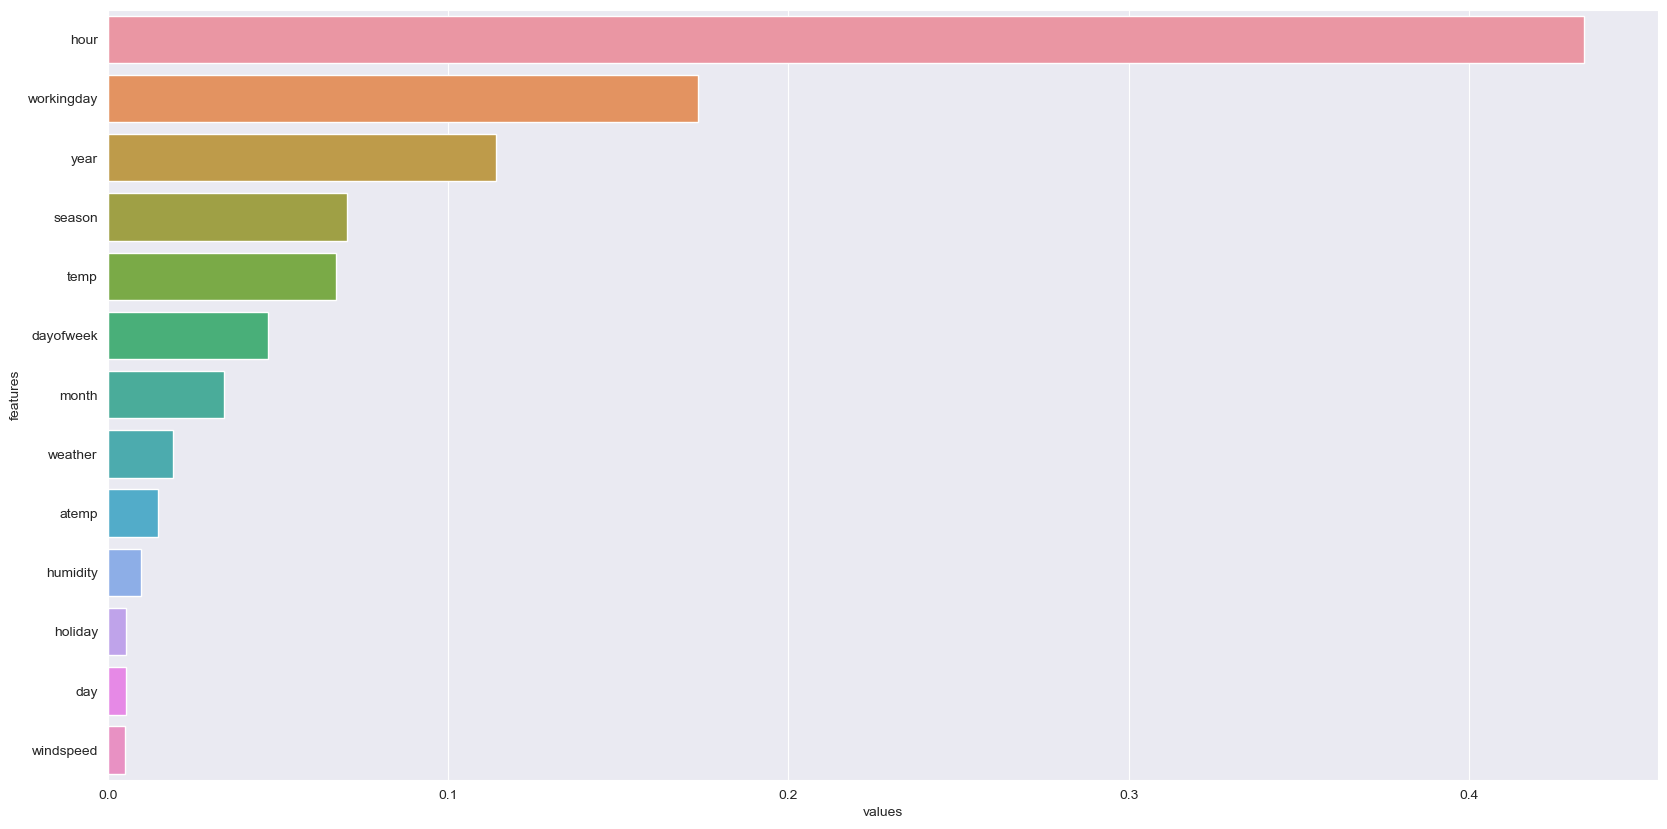

In [49]:
feature_importance(xg_reg)

<class 'lightgbm.sklearn.LGBMRegressor'>


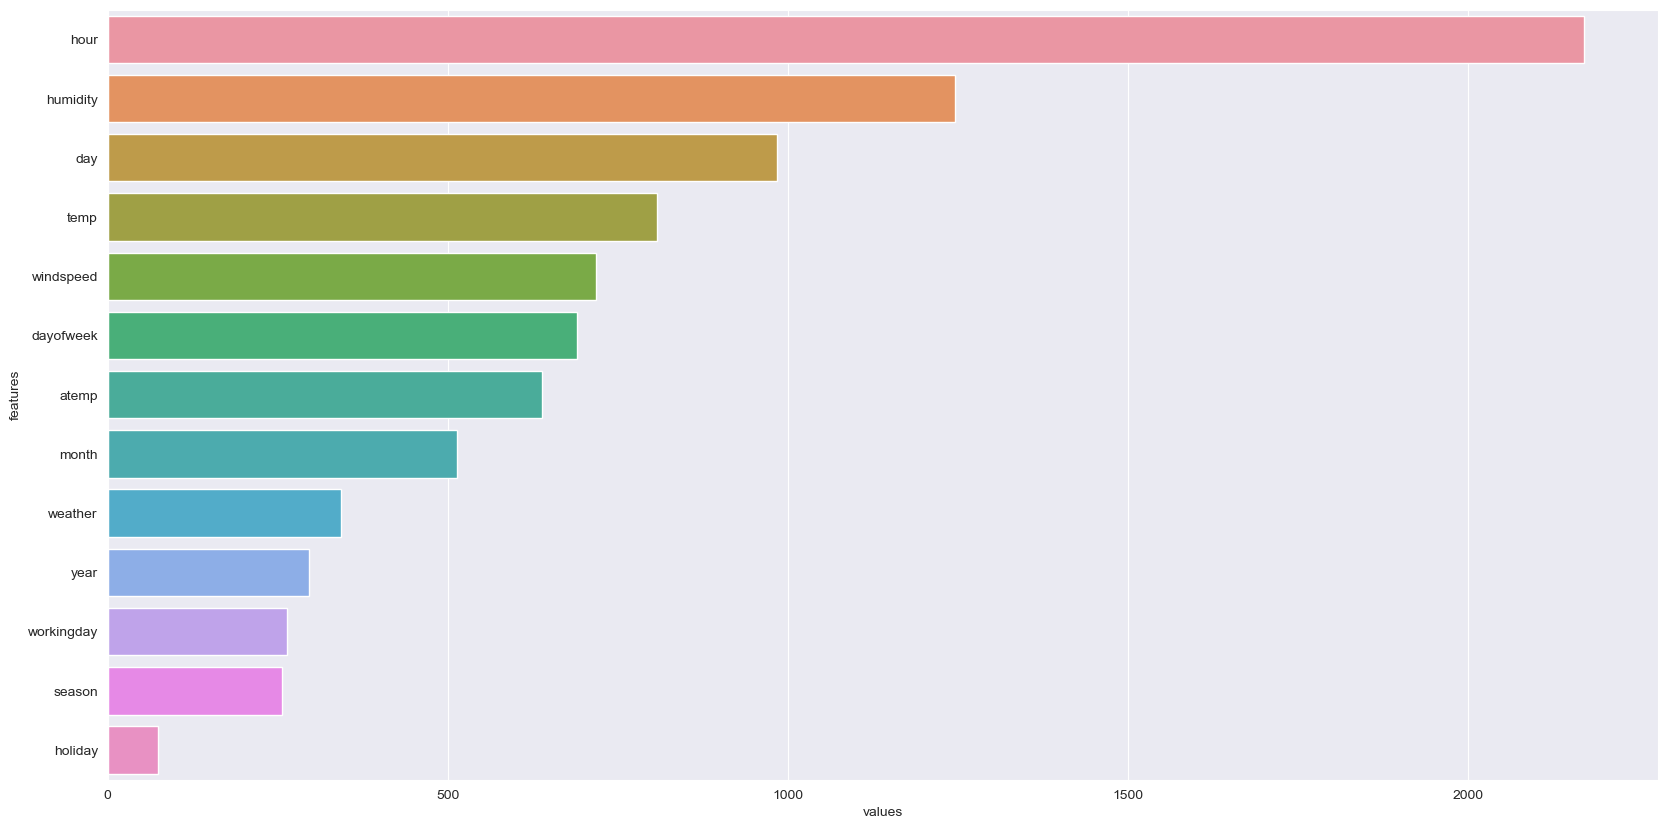

In [50]:
feature_importance(lg_reg)

In [51]:
submission=pd.read_csv('sampleSubmission.csv')
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [53]:
test.shape

(6493, 13)

In [54]:
submission.shape

(6493, 2)

In [55]:
pred=lg_reg.predict(test)
pred_exp=np.expm1(pred)
print(pred_exp)

[  8.11931143   4.30613151   3.04600999 ... 140.03354501  93.78541653
  44.55677795]


In [56]:
submission.loc[:,'count']=pred_exp
submission

,datetime,count
0,2011-01-20 00:00:00,8.119311
1,2011-01-20 01:00:00,4.306132
2,2011-01-20 02:00:00,3.046010
3,2011-01-20 03:00:00,2.100047
4,2011-01-20 04:00:00,2.101791
...,...,...
6488,2012-12-31 19:00:00,257.747390
6489,2012-12-31 20:00:00,166.471834
6490,2012-12-31 21:00:00,140.033545
6491,2012-12-31 22:00:00,93.785417
